<a href="https://colab.research.google.com/github/meghna-panda/plant_disease_detection/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
zip_file_path = "/content/drive/MyDrive/plant disease edunet.zip"
extract_dir = "/content"
if os.path.exists(zip_file_path):
  try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'.")
  except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid zip file.")
  except Exception as e:
    print(f"An error occurred: {e}")
else:
  print(f"Error: The file '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/plant disease edunet.zip' to '/content'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [ ]:
train='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
size=224

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

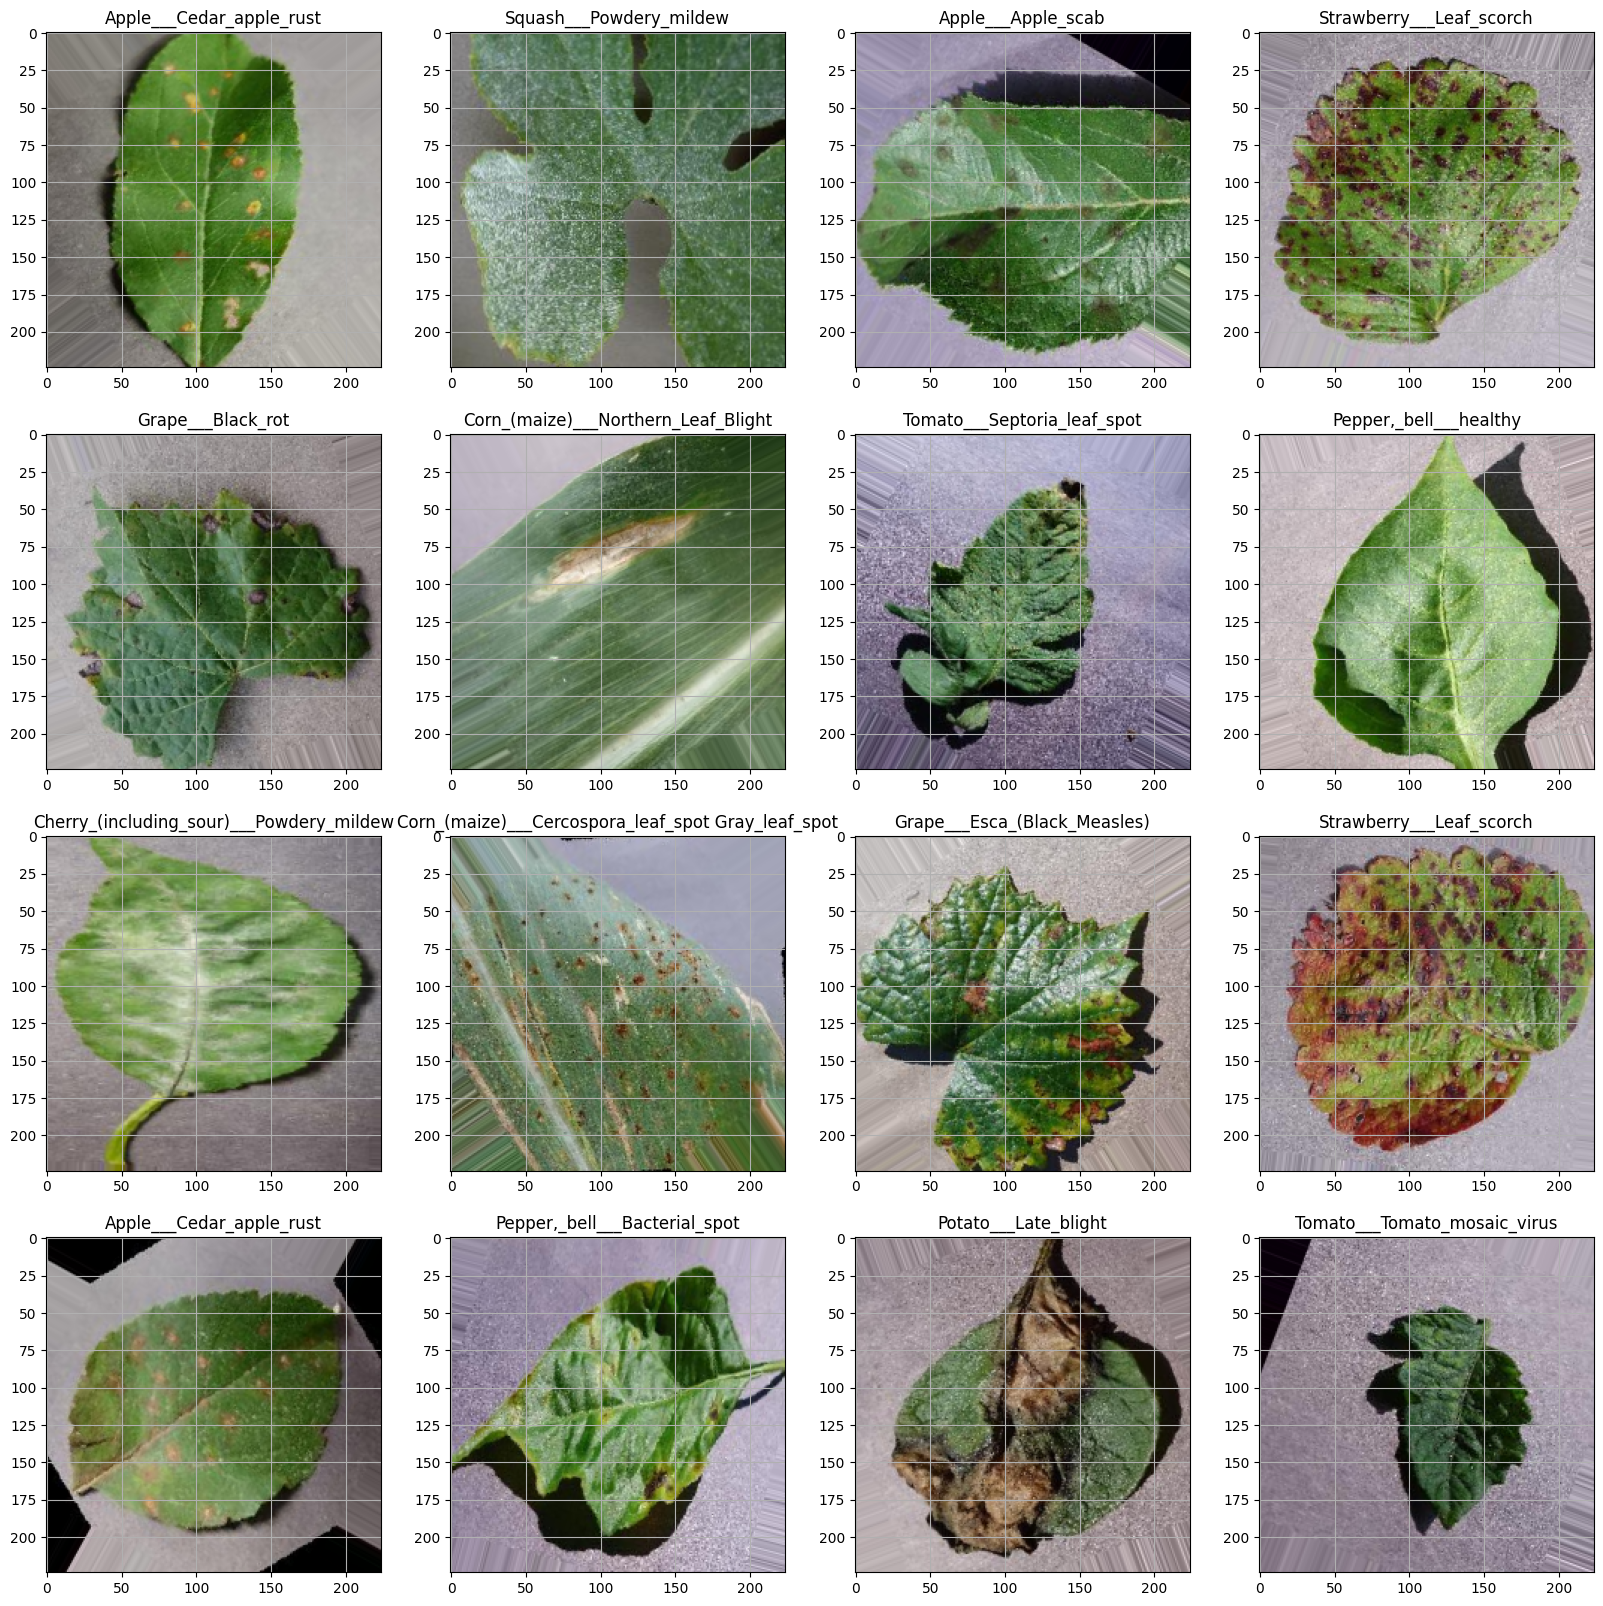

In [ ]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,y_batch in train_generator:
  for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [ ]:
valid="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [ ]:
test="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [ ]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv3"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu", name="Conv4"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))
model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
tf.keras.layers.Dropout(0.5)
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
tf.keras.layers.Dropout(0.5)
model.add(keras.layers.Dense(38, activation="softmax", name="Output"))
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks = [early_stopping, model_checkpoint, model_ReduceLROnPlateau]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 984s 2s/step - accuracy: 0.2060 - loss: 2.9037 - precision: 0.7015 - recall: 0.0781 - val_accuracy: 0.5385 - val_loss: 1.4999 - val_precision: 0.7256 - val_recall: 0.4145 - learning_rate: 0.0010
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 855s 2s/step - accuracy: 0.6749 - loss: 1.0599 - precision: 0.8143 - recall: 0.5504 - val_accuracy: 0.7256 - val_loss: 0.8380 - val_precision: 0.8182 - val_recall: 0.6406 - learning_rate: 0.0010
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.8182 - loss: 0.5783 - precision: 0.8769 - recall: 0.7650 - val_accuracy: 0.8272 - val_loss: 0.5003 - val_precision: 0.8674 - val_recall: 0.7962 - learning_rate: 0.0010
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 852s 2s/step - accuracy: 0.8598 - loss: 0.4359 - precision: 0.8975 - recall: 0.8288 - val_accuracy: 0.8571 - val_loss: 0.4462 - val_precision: 0.8890 - val_recall: 0.8324 - learning_rate: 0.0010
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 858s 2s/step - accur

In [ ]:
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
precision = history.history['precision']
val_precision = history.history['val_precision']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


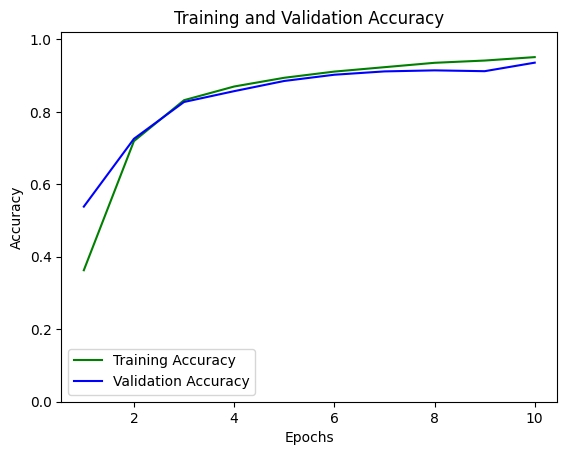

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [ ]:
model_evaluate = model.evaluate(test_generator)
print("Loss: ", model_evaluate[0])
print("Accuracy: ", model_evaluate[1])
print("Precision: ", model_evaluate[2])
print("Recall: ", model_evaluate[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 418ms/step - accuracy: 0.9496 - loss: 0.1586 - precision: 0.9552 - recall: 0.9453
Loss:  0.17024613916873932
Accuracy:  0.9450830817222595
Precision:  0.9527354836463928
Recall:  0.9395060539245605


In [ ]:
model.save('PDDS.keras')

In [ ]:
!pip install flask ngrok


In [ ]:
%%writefile app.py
from flask import Flask, request, render_template_string
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

app = Flask(__name__)
model = load_model('PDDS.keras')

HTML_TEMPLATE = '''
<!DOCTYPE html>
<html>
<head><title>Plant Disease Detector</title></head>
<body>
    <h1>Upload a Plant Leaf Image</h1>
    <form action="/predict" method="POST" enctype="multipart/form-data">
        <input type="file" name="file" required>
        <input type="submit" value="Predict">
    </form>
    {% if prediction %}
        <h2>{{ prediction }}</h2>
    {% endif %}
</body>
</html>
'''

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

@app.route('/', methods=['GET'])
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    filepath = os.path.join('/tmp', file.filename)
    file.save(filepath)

    img = preprocess_image(filepath)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return render_template_string(HTML_TEMPLATE, prediction=f"Predicted Class: {predicted_class}")



Overwriting app.py


In [ ]:
!pip install pyngrok flask
from pyngrok import ngrok
import os
ngrok.kill()
ngrok.set_auth_token("2x8t59tGuMO515I3CXQtX98u7yV_5MeLrFQboSKB7LJHuHCG4")
os.system("FLASK_APP=app.py flask run --host=0.0.0.0 --port=5000 &")
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://0eb0-34-87-86-49.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
!python --version


Python 3.11.12
